IBM HR Analytics Employee Attrition and Performance

step 1:load the dataset

In [5]:
import pandas as pd

# Load the dataset
file_path = '/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Get dataset summary
print(df.info())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

step 2:Basic data cleaning

In [6]:
# Check for missing values
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

step 3:calculate Turnover rate

In [7]:
# Calculate overall turnover rate
turnover_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Turnover Rate:\n", turnover_rate)


Turnover Rate:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


Step 4:Analyze Attrition by Demographics

Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068


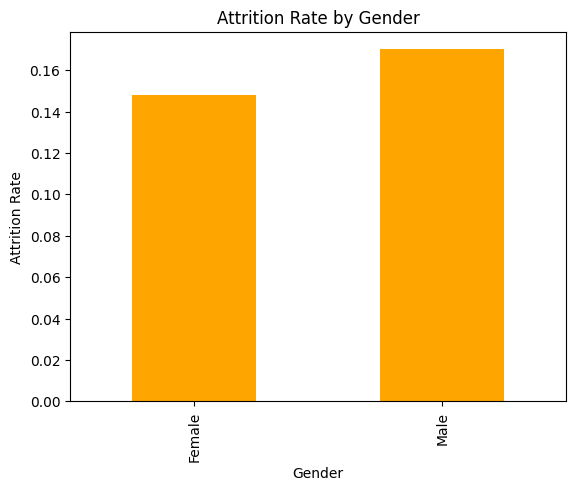

In [8]:
# Attrition by gender
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_gender)

# Visualization (optional)
import seaborn as sns
import matplotlib.pyplot as plt

attrition_by_gender['Yes'].plot(kind='bar', color='orange', title="Attrition Rate by Gender")
plt.ylabel('Attrition Rate')
plt.show()


In [11]:
print(df.dtypes)
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_df.corr()
print(correlation)



Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric columns
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Calculate correlation matrix
correlation = df_encoded.corr()
print(correlation)


                               Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate  

Attrition by Monthly income

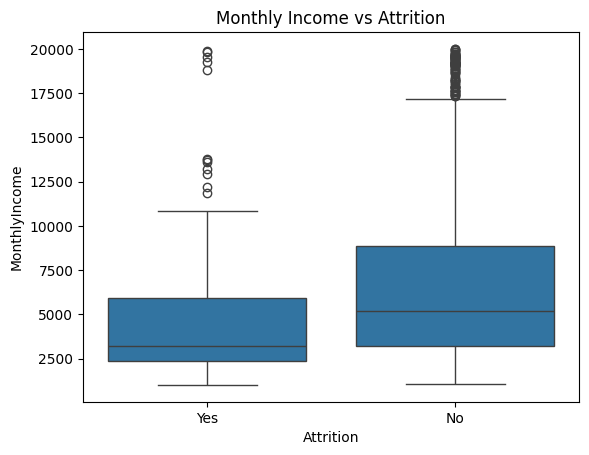

In [14]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()
